##### Model Building and Prediction
In this notebook, I am using random forest to predict revenue. Using GridSearchCV to find best parameters for model. Also for model evaluation, I am using root mean squared log error.

In [86]:
import numpy as np
import eli5
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from collections import Counter
import wordcloud
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [87]:
data=r'C:\Users\bhardwaj\Downloads\tmdb-box-office-prediction\dataframe1.csv'

In [88]:
df=pd.read_csv(data)

In [89]:
df.set_index('id',inplace=True)

###### Here deleting the variables that are not required.

In [90]:
df['log_revenue']=np.log1p(df['revenue'])

In [91]:
df.drop(axis=1,columns='tagline',inplace=True)

In [92]:
df.drop(axis=1,columns='genres',inplace=True)

In [93]:
df.drop(axis=1,columns='belongs_to_collection',inplace=True)

In [94]:
df.drop(axis=1,columns='homepage',inplace=True)

In [95]:
df.drop(axis=1,columns='imdb_id',inplace=True)

In [96]:
df.drop(axis=1,columns='original_title',inplace=True)

In [97]:
df.drop(axis=1,columns='overview',inplace=True)

In [98]:
df.drop(axis=1,columns='original_language',inplace=True)

In [99]:
df.drop(axis=1,columns='poster_path',inplace=True)

In [100]:
df.drop(axis=1,columns='production_companies',inplace=True)

In [101]:
df.drop(axis=1,columns='production_countries',inplace=True)

In [102]:
df.drop(axis=1,columns='release_date',inplace=True)

In [103]:
df.drop(axis=1,columns='spoken_languages',inplace=True)

In [104]:
df.drop(axis=1,columns='status',inplace=True)

In [105]:
df.drop(axis=1,columns='title',inplace=True)

In [106]:
df.drop(axis=1,columns='Keywords',inplace=True)

In [107]:
df.drop(axis=1,columns='cast',inplace=True)

In [108]:
df.drop(axis=1,columns='crew',inplace=True)

In [109]:
df.drop(axis=1,columns='all_genres',inplace=True)

In [110]:
df.drop(axis=1,columns='all_lan',inplace=True)

In [111]:
df.drop(axis=1,columns='all_pcomp',inplace=True)

In [112]:
df.drop(axis=1,columns='all_pcoun',inplace=True)

KeyError: "['all_pcoun'] not found in axis"

In [114]:
df.drop(axis=1,columns='all_keyword',inplace=True)

In [115]:
df.drop(axis=1,columns='all_cast',inplace=True)

In [116]:
df.drop(axis=1,columns='release_date_year',inplace=True)

In [117]:
df.isnull().sum()

budget                           0
popularity                       0
runtime                          2
revenue                          0
has_collection                   0
num_genres                       0
genre_Drama                      0
genre_Comedy                     0
genre_Thriller                   0
genre_Action                     0
genre_Romance                    0
genre_Crime                      0
genre_Adventure                  0
genre_Horror                     0
genre_Science Fiction            0
genre_Family                     0
genre_Fantasy                    0
genre_Mystery                    0
genre_Animation                  0
genre_History                    0
genre_Music                      0
num_lan                          0
spoken_language_en               0
spoken_language_fr               0
spoken_language_es               0
spoken_language_de               0
spoken_language_ru               0
spoken_language_it               0
spoken_language_ja  

The only missing value is in runtime. Therefore deleting those values.

In [118]:
df.dropna(inplace=True)

In [131]:
X = df.drop(['log_revenue','revenue'], axis=1)

In [132]:
Y=df['log_revenue']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
df.shape

(2998, 154)

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = { 'max_depth': [65,70,75,80,85,90,95,100,105,110],
    'max_features': [50,55,60,65,70,75,80,85,90,95,100,105,110]}

In [138]:
rf = RandomForestRegressor()

In [139]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv =4)

In [140]:
df = df.astype(float)

In [141]:
grid_search.fit(X_train, y_train)

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\f

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [65, 70, 75, 80, 85, 90, 95, 100, 105, 110], 'max_features': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [142]:
grid_search.best_params_

{'max_depth': 105, 'max_features': 105}

In [145]:
rfc1=RandomForestRegressor(max_features=105,max_depth=105)

In [146]:
rfc1.fit(X_train,y_train)

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=105,
           max_features=105, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [147]:
pred=rfc1.predict(X_test)

In [148]:
pred

array([15.83314372, 18.55893142, 16.52738912, 18.31358255, 17.44700646,
       17.66451742, 15.55122322, 18.19630884, 17.66487189, 17.0812651 ,
       18.83062788, 16.21663422, 18.65996579, 17.17936795, 16.15875024,
       15.25916544, 16.00089724, 17.33986111, 17.3387276 , 18.54254343,
       15.35414872, 15.95954482, 18.70873014, 17.21083968, 14.93042021,
       12.24336984, 17.84270782, 14.07259534, 15.22898394, 15.70093706,
       16.46913123, 13.93506737, 18.65363612, 14.20354165, 16.71723114,
       12.66010215, 18.20768991, 13.83081766, 17.63294189, 11.99085393,
       12.97172828, 16.93733431, 17.58544218, 13.43115029, 17.9094928 ,
       15.9891998 , 18.1292618 , 13.32302756, 13.84550219, 19.40184288,
       15.57114189, 17.57200503, 15.24604787, 19.55908342, 16.27048366,
       15.24850241, 17.82104098, 18.28354184, 15.25590982, 11.87941276,
       18.28628578, 17.55358641, 12.71315041, 19.13117542, 15.38985143,
       14.97133083, 13.72286577, 14.41381942, 18.26771265, 16.44

In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
mean_squared_error(y_test,pred)

3.9990676098481965

In [153]:
root_mean_squared_error=(mean_squared_error(y_test,pred))*0.5

In [154]:
root_mean_squared_error

1.9995338049240983

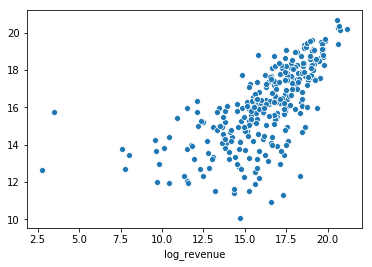

In [155]:
sns.scatterplot(y_test,pred)

Except for some values, random forest predicts higher value for observations with actual higher revenue.